### Buisiness objective

### Data description

### Import crucial libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(18, 7)
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
data = pd.read_csv('Dataset (5).csv')
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


### Exploratory Data Analysis

In [4]:
# Shape of data
print('Shape of data --->' , data.shape)
print('There are {} features and {} rows in data.'.format(data.shape[1], data.shape[0]))

Shape of data ---> (164309, 14)
There are 14 features and 164309 rows in data.


In [5]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [6]:
columns = ['Loan_ID', 'Loan_Amount_Requested', 'Employment_experience_in_years', 'Ownership_of_home',
       'Annual_Income', 'Income_verification', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_in_Last_6_Months', 'Days_since_deliquency', 'Number_of_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate']

In [7]:
data.columns = columns

In [8]:
# Remove unwanted columns
data.drop(['Loan_ID'], axis =1, inplace=True)

In [9]:
print('Shape of data --->' , data.shape)
print('Now we have {} features and {} rows.'.format(data.shape[1], data.shape[0]))

Shape of data ---> (164309, 13)
Now we have 13 features and 164309 rows.


In [10]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Loan_Amount_Requested           164309 non-null  object 
 1   Employment_experience_in_years  156938 non-null  object 
 2   Ownership_of_home               138960 non-null  object 
 3   Annual_Income                   139207 non-null  float64
 4   Income_verification             164309 non-null  object 
 5   Purpose_Of_Loan                 164309 non-null  object 
 6   Debt_To_Income                  164309 non-null  float64
 7   Inquiries_in_Last_6_Months      164309 non-null  int64  
 8   Days_since_deliquency           75930 non-null   float64
 9   Number_of_Open_Accounts         164309 non-null  int64  
 10  Total_Accounts                  164309 non-null  int64  
 11  Gender                          164309 non-null  object 
 12  Interest_Rate   

In [11]:
# Removing special sequences
data['Loan_Amount_Requested'] = data['Loan_Amount_Requested'].str.replace(r'\D', '', regex=True)

In [12]:
data['Loan_Amount_Requested'].dtype

dtype('O')

In [13]:
# Coverting feature which is read in incorrect format to correct format, i.e from object to integer
data['Loan_Amount_Requested'] = pd.to_numeric(data['Loan_Amount_Requested'], downcast='integer')

In [14]:
data['Loan_Amount_Requested'].dtype

dtype('int32')

### Categorical features

In [15]:
cat_feat = data.select_dtypes(include='O')
cat_feat.columns

Index(['Employment_experience_in_years', 'Ownership_of_home',
       'Income_verification', 'Purpose_Of_Loan', 'Gender'],
      dtype='object')

In [16]:
for i in cat_feat.columns:
    print(i, '\n', data[i].unique())

Employment_experience_in_years 
 ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']
Ownership_of_home 
 ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']
Income_verification 
 ['not verified' 'VERIFIED - income' 'VERIFIED - income source']
Purpose_Of_Loan 
 ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']
Gender 
 ['Female' 'Male']


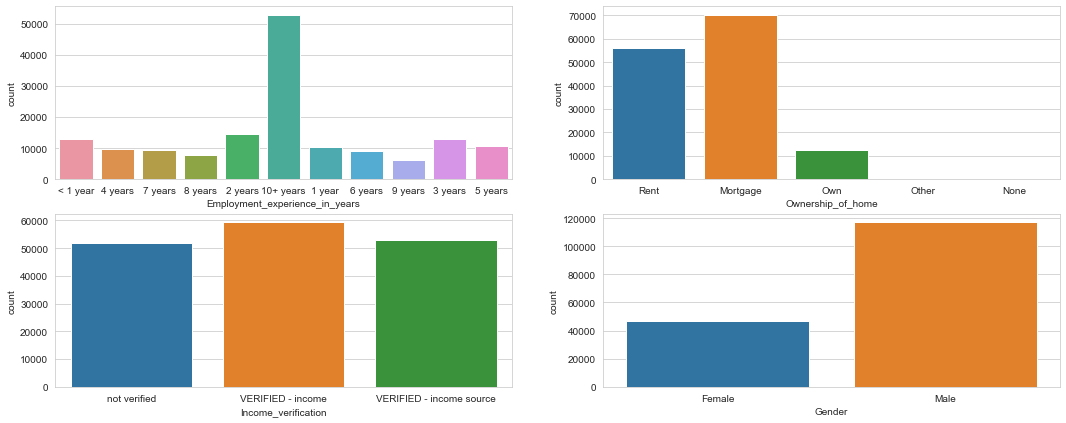

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2)
sns.countplot(data['Employment_experience_in_years'], ax=ax[0][0])
sns.countplot(data['Ownership_of_home'], ax=ax[0][1])
sns.countplot(data['Income_verification'], ax=ax[1][0],)
sns.countplot(data['Gender'], ax=ax[1][1])
plt.show()

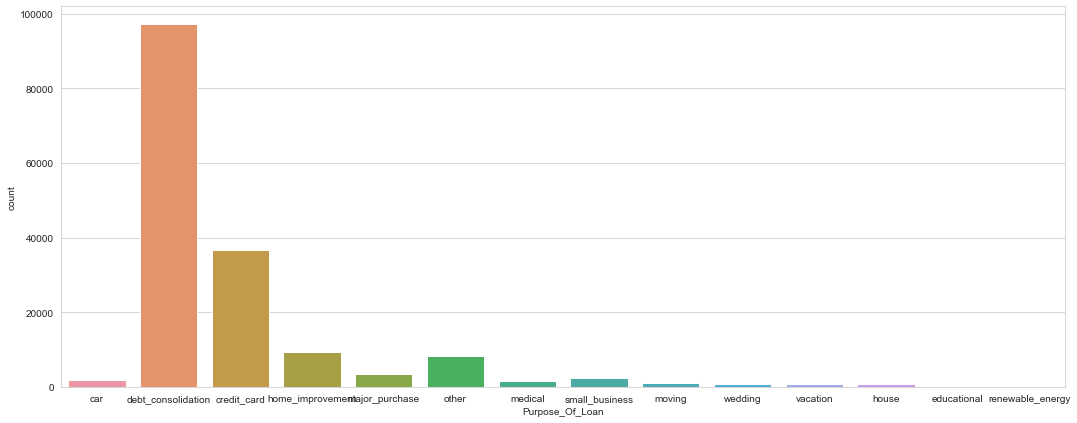

In [18]:
sns.countplot(data['Purpose_Of_Loan'], data=data);

In [19]:
# Length employed
# Converting Length employed into different categories based on years of experience.

In [20]:
data.Employment_experience_in_years.unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [21]:
data.Employment_experience_in_years.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Employment_experience_in_years, dtype: int64

In [22]:
data['Employment_experience_in_years'] = data['Employment_experience_in_years'].replace(to_replace=['< 1 year', '4 years', '7 years', '8 years', '2 years','10+ years', '1 year','6 years', '9 years', '3 years','5 years'],
                                                               value=['0', '4', '7', '8', '2', '10+', '1', '6', '9', '3', '5'])

In [23]:
data['Employment_experience_in_years'].value_counts()

10+    52915
2      14620
3      12974
0      12805
5      10814
1      10422
4       9784
7       9308
6       9094
8       7917
9       6285
Name: Employment_experience_in_years, dtype: int64

In [24]:
# Home_Owner
data.Ownership_of_home.unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [25]:
data.Ownership_of_home.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Ownership_of_home, dtype: int64

In [26]:
data['Ownership_of_home'] = np.where(data['Ownership_of_home']=='Other', 'None', data['Ownership_of_home'])

In [27]:
data.Ownership_of_home.value_counts()

Mortgage    70345
Rent        56031
Own         12525
None           59
Name: Ownership_of_home, dtype: int64

In [28]:
data.Ownership_of_home.value_counts(normalize=True)

Mortgage    0.506225
Rent        0.403217
Own         0.090134
None        0.000425
Name: Ownership_of_home, dtype: float64

In [29]:
data.Ownership_of_home.describe()

count       138960
unique           4
top       Mortgage
freq         70345
Name: Ownership_of_home, dtype: object

In [30]:
# Income_Verified 
data.Income_verification.unique()

array(['not verified', 'VERIFIED - income', 'VERIFIED - income source'],
      dtype=object)

In [31]:
data.Income_verification.value_counts(normalize=True)

VERIFIED - income           0.361642
VERIFIED - income source    0.322654
not verified                0.315704
Name: Income_verification, dtype: float64

In [32]:
data['Income_verification'] = data['Income_verification'].replace(to_replace=['VERIFIED - income', 'VERIFIED - income source'], value='verified')

In [33]:
data.Income_verification.value_counts(normalize=True)

verified        0.684296
not verified    0.315704
Name: Income_verification, dtype: float64

In [34]:
# Purpose_Of_Loan 
data.Purpose_Of_Loan.unique()

array(['car', 'debt_consolidation', 'credit_card', 'home_improvement',
       'major_purchase', 'other', 'medical', 'small_business', 'moving',
       'wedding', 'vacation', 'house', 'educational', 'renewable_energy'],
      dtype=object)

In [35]:
data.Purpose_Of_Loan.value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [36]:
data.Interest_Rate.value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [37]:
data.Interest_Rate.describe()

count    164309.000000
mean          2.158951
std           0.738364
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: Interest_Rate, dtype: float64

### Numerical features

In [38]:
num_feat = data.select_dtypes(include='number')
num_feat.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_in_Last_6_Months', 'Days_since_deliquency',
       'Number_of_Open_Accounts', 'Total_Accounts', 'Interest_Rate'],
      dtype='object')

In [39]:
num_feat.describe().round(2)

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Number_of_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.00,139207.00,164309.00,164309.00,75930.00,164309.00,164309.00,164309.00
mean,14349.34,73331.16,17.21,0.78,34.23,11.19,25.07,2.16
std,8281.87,60377.50,7.85,1.03,21.76,4.99,11.58,0.74
min,500.00,4000.00,0.00,0.00,0.00,0.00,2.00,1.00
25%,8000.00,45000.00,11.37,0.00,16.00,8.00,17.00,2.00
50%,12075.00,63000.00,16.84,0.00,31.00,10.00,23.00,2.00
75%,20000.00,88697.50,22.78,1.00,50.00,14.00,32.00,3.00
max,35000.00,7500000.00,39.99,8.00,180.00,76.00,156.00,3.00


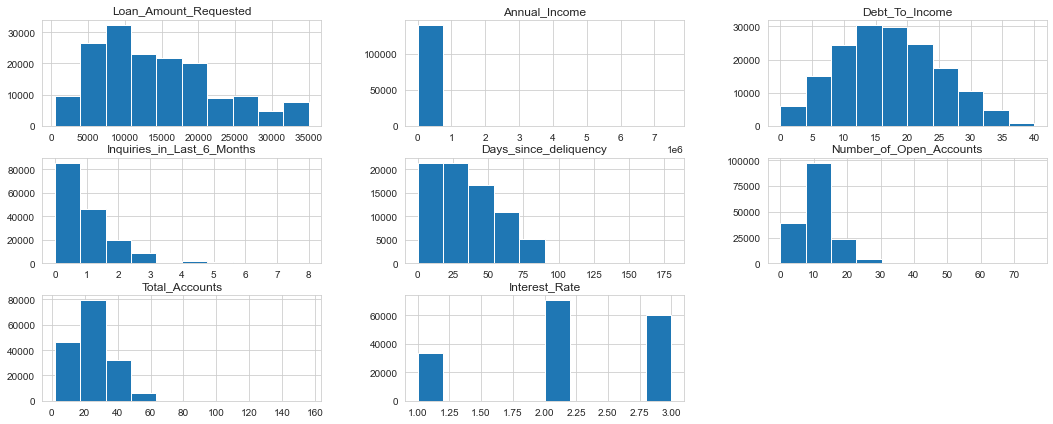

In [40]:
# Distribution of data
data.hist()
plt.show()

### Duplicated Records

In [41]:
data.duplicated().sum()

0

### Null values

In [42]:

data.isnull().sum()

Loan_Amount_Requested                 0
Employment_experience_in_years     7371
Ownership_of_home                 25349
Annual_Income                     25102
Income_verification                   0
Purpose_Of_Loan                       0
Debt_To_Income                        0
Inquiries_in_Last_6_Months            0
Days_since_deliquency             88379
Number_of_Open_Accounts               0
Total_Accounts                        0
Gender                                0
Interest_Rate                         0
dtype: int64

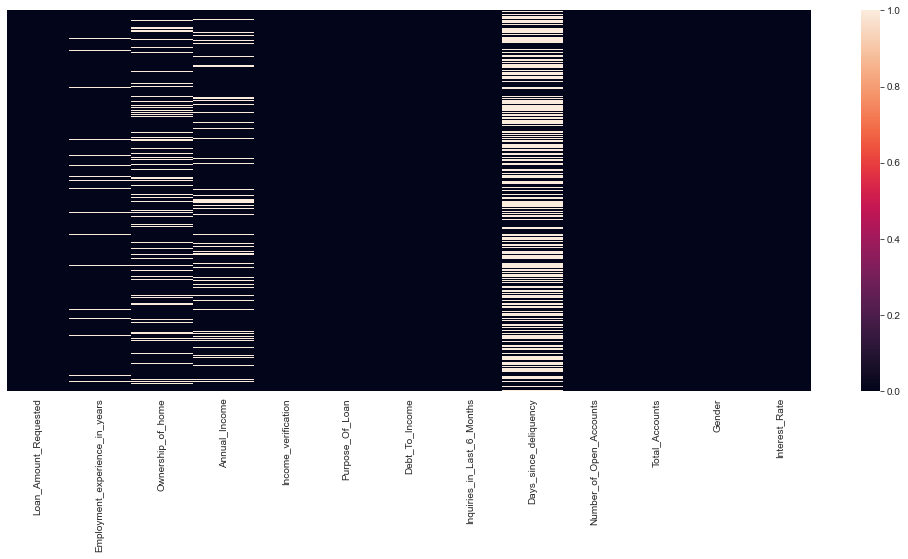

In [43]:
# Visualization of null values
sns.heatmap(data.isnull(), yticklabels=False);

In [44]:
# Replacing null values in categorical features
data['Ownership_of_home'] = data['Ownership_of_home'].fillna(data['Ownership_of_home'].mode()[0])
data['Employment_experience_in_years'] = data['Employment_experience_in_years'].fillna(data['Employment_experience_in_years'].mode()[0])

    * Null values in categorical features are replaced with mode value (most frequent value)

In [45]:
# Replacing null values in numerical features
data['Annual_Income'] = data['Annual_Income'].fillna(data['Annual_Income'].mean())
data['Days_since_deliquency'] = data['Days_since_deliquency'].fillna(data['Days_since_deliquency'].mode()[0])

    * Null values in numerical features are replaced with mean and mode values

In [46]:
data.isnull().sum()

Loan_Amount_Requested             0
Employment_experience_in_years    0
Ownership_of_home                 0
Annual_Income                     0
Income_verification               0
Purpose_Of_Loan                   0
Debt_To_Income                    0
Inquiries_in_Last_6_Months        0
Days_since_deliquency             0
Number_of_Open_Accounts           0
Total_Accounts                    0
Gender                            0
Interest_Rate                     0
dtype: int64

    * Now there is no null values in our data

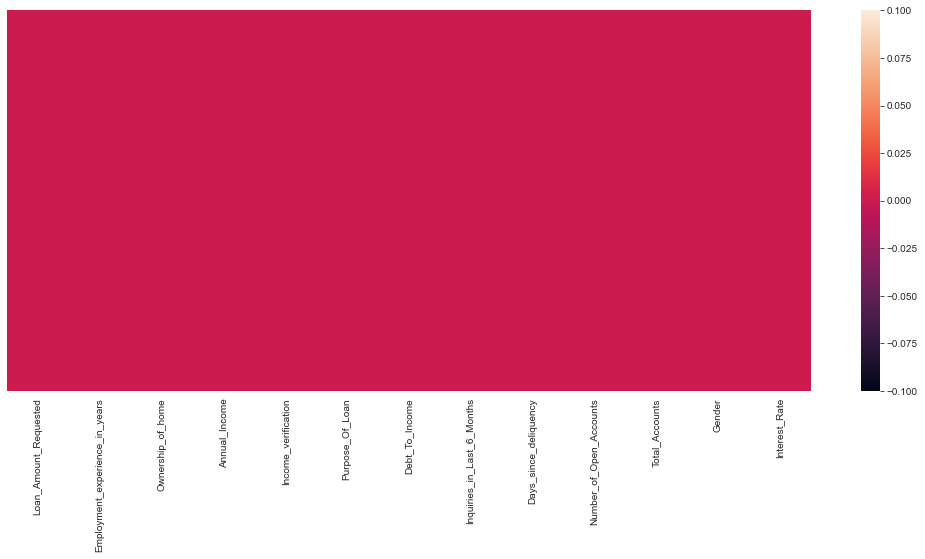

In [47]:
sns.heatmap(data.isnull(), yticklabels=False);

### Outliers

In [48]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9,0.95, 0.99]).round(2)

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Number_of_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00
mean,14349.34,73331.16,17.21,0.78,20.66,11.19,25.07,2.16
std,8281.87,55574.39,7.85,1.03,19.42,4.99,11.58,0.74
min,500.00,4000.00,0.00,0.00,0.00,0.00,2.00,1.00
1%,1800.00,20000.00,1.67,0.00,3.00,3.00,6.00,1.00
5%,3500.00,29643.40,4.84,0.00,8.00,5.00,9.00,1.00
10%,5000.00,35000.00,7.04,0.00,9.00,6.00,12.00,1.00
25%,8000.00,48600.00,11.37,0.00,9.00,8.00,17.00,2.00
50%,12075.00,70000.00,16.84,0.00,9.00,10.00,23.00,2.00
75%,20000.00,82000.00,22.78,1.00,28.00,14.00,32.00,3.00


    From describe method we observed that, 
        * Outliers are present in Annual_income, Days_since_deliquency, Number_of_Open_Accounts, Total_Accounts

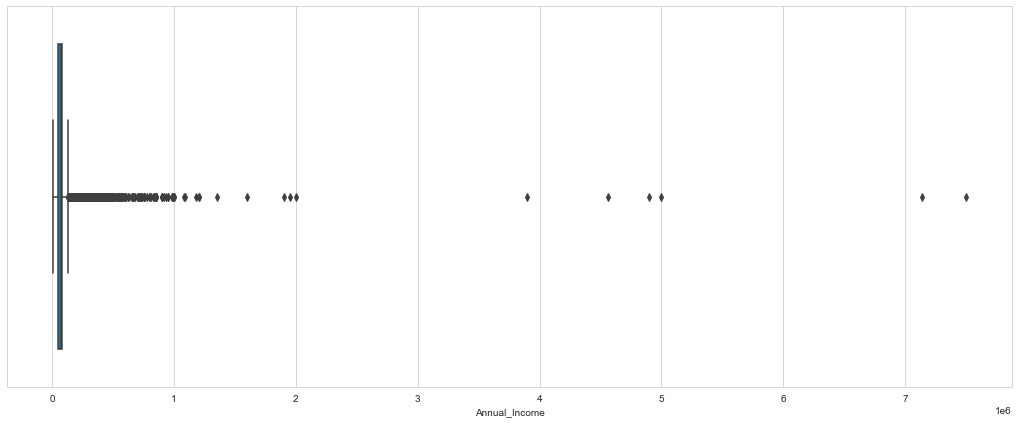

In [49]:
# Annual Income
sns.boxplot(data=data, x='Annual_Income');

In [50]:
Q1 = data.Annual_Income.quantile(0.25)
Q3 = data.Annual_Income.quantile(0.75)
IQR = Q3-Q1

In [51]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
print('Lower limit = {}'.format(lower_limit))
print('Upper limit = {}'.format(upper_limit))

Lower limit = -1500.0
Upper limit = 132100.0


In [52]:
# Capping upper outliers in annual income
data['Annual_Income'] = np.where(data['Annual_Income']>=225000, 225000, data['Annual_Income'])

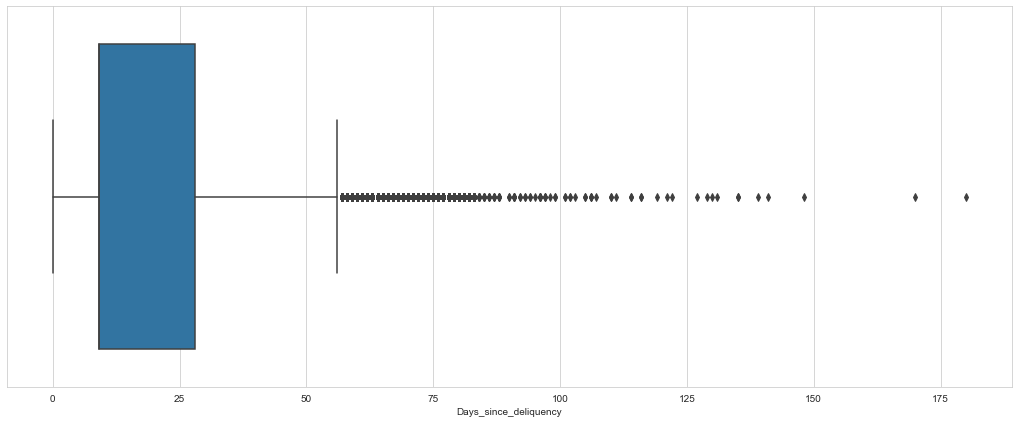

In [53]:
# Days_since_deliquency
sns.boxplot(data=data, x='Days_since_deliquency');

In [54]:
Q1 = data.Days_since_deliquency.quantile(0.25)
Q3 = data.Days_since_deliquency.quantile(0.75)
IQR = Q3-Q1

In [55]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
print('Lower limit = {}'.format(lower_limit))
print('Upper limit = {}'.format(upper_limit))

Lower limit = -19.5
Upper limit = 56.5


In [56]:
data['Days_since_deliquency'] = np.where(data['Days_since_deliquency']>=80, 80,data['Days_since_deliquency'])

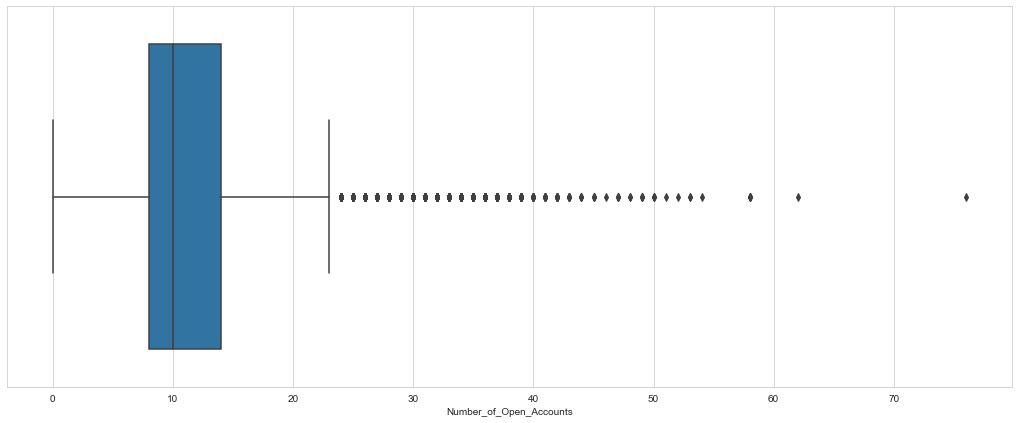

In [57]:
# Number_of_Open_Accounts
sns.boxplot(data=data, x='Number_of_Open_Accounts');

In [58]:
Q1 = data.Number_of_Open_Accounts.quantile(0.25)
Q3 = data.Number_of_Open_Accounts.quantile(0.75)
IQR = Q3-Q1

In [59]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
print('Lower limit = {}'.format(lower_limit))
print('Upper limit = {}'.format(upper_limit))

Lower limit = -1.0
Upper limit = 23.0


In [60]:
# Capping upper outliers
data['Number_of_Open_Accounts'] = np.where(data['Number_of_Open_Accounts']>=30, 30, data['Number_of_Open_Accounts'])

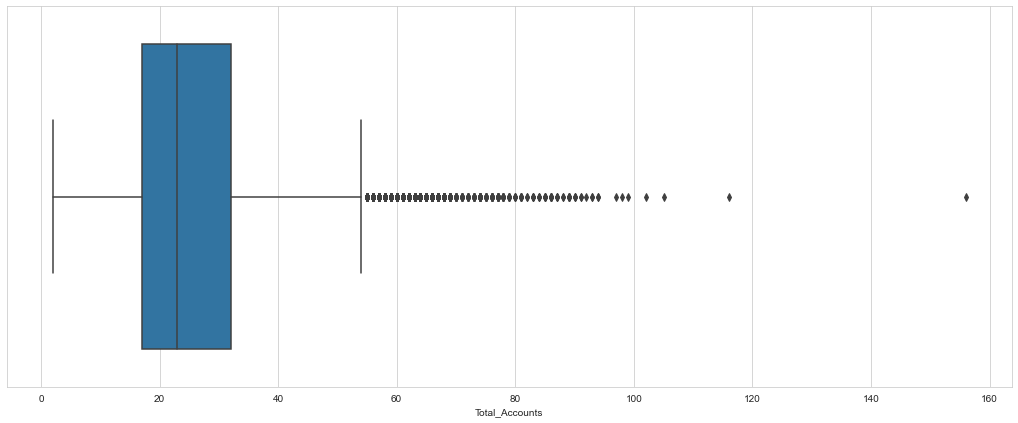

In [61]:
# Total_Accounts
sns.boxplot(data=data, x='Total_Accounts');

In [62]:
Q1 = data.Total_Accounts.quantile(0.25)
Q3 = data.Total_Accounts.quantile(0.75)
IQR = Q3-Q1

In [63]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)
print('Lower limit = {}'.format(lower_limit))
print('Upper limit = {}'.format(upper_limit))

Lower limit = -5.5
Upper limit = 54.5


In [64]:
# Capping upper outliers
data['Total_Accounts'] = np.where(data['Total_Accounts']>=60, 60, data['Total_Accounts'])

In [65]:
data.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9,0.95, 0.99]).round(2)

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Number_of_Open_Accounts,Total_Accounts,Interest_Rate
count,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00,164309.00
mean,14349.34,72079.57,17.21,0.78,20.64,11.18,25.02,2.16
std,8281.87,35649.73,7.85,1.03,19.36,4.90,11.42,0.74
min,500.00,4000.00,0.00,0.00,0.00,0.00,2.00,1.00
1%,1800.00,20000.00,1.67,0.00,3.00,3.00,6.00,1.00
5%,3500.00,29643.40,4.84,0.00,8.00,5.00,9.00,1.00
10%,5000.00,35000.00,7.04,0.00,9.00,6.00,12.00,1.00
25%,8000.00,48600.00,11.37,0.00,9.00,8.00,17.00,2.00
50%,12075.00,70000.00,16.84,0.00,9.00,10.00,23.00,2.00
75%,20000.00,82000.00,22.78,1.00,28.00,14.00,32.00,3.00


In [66]:
data.head()

,Loan_Amount_Requested,Employment_experience_in_years,Ownership_of_home,Annual_Income,Income_verification,Purpose_Of_Loan,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Number_of_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,7000,0,Rent,68000.000000,not verified,car,18.37,0,9.0,9,14,Female,1
1,30000,4,Mortgage,73331.159434,verified,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,24725,7,Mortgage,75566.400000,verified,debt_consolidation,15.88,0,9.0,12,16,Male,3
3,16000,0,Mortgage,56160.000000,verified,debt_consolidation,14.34,3,9.0,16,22,Male,3
4,17000,8,Own,96000.000000,verified,debt_consolidation,22.17,1,9.0,19,30,Female,1


In [69]:
data.columns

Index(['Loan_Amount_Requested', 'Employment_experience_in_years',
       'Ownership_of_home', 'Annual_Income', 'Income_verification',
       'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_in_Last_6_Months',
       'Days_since_deliquency', 'Number_of_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate'],
      dtype='object')

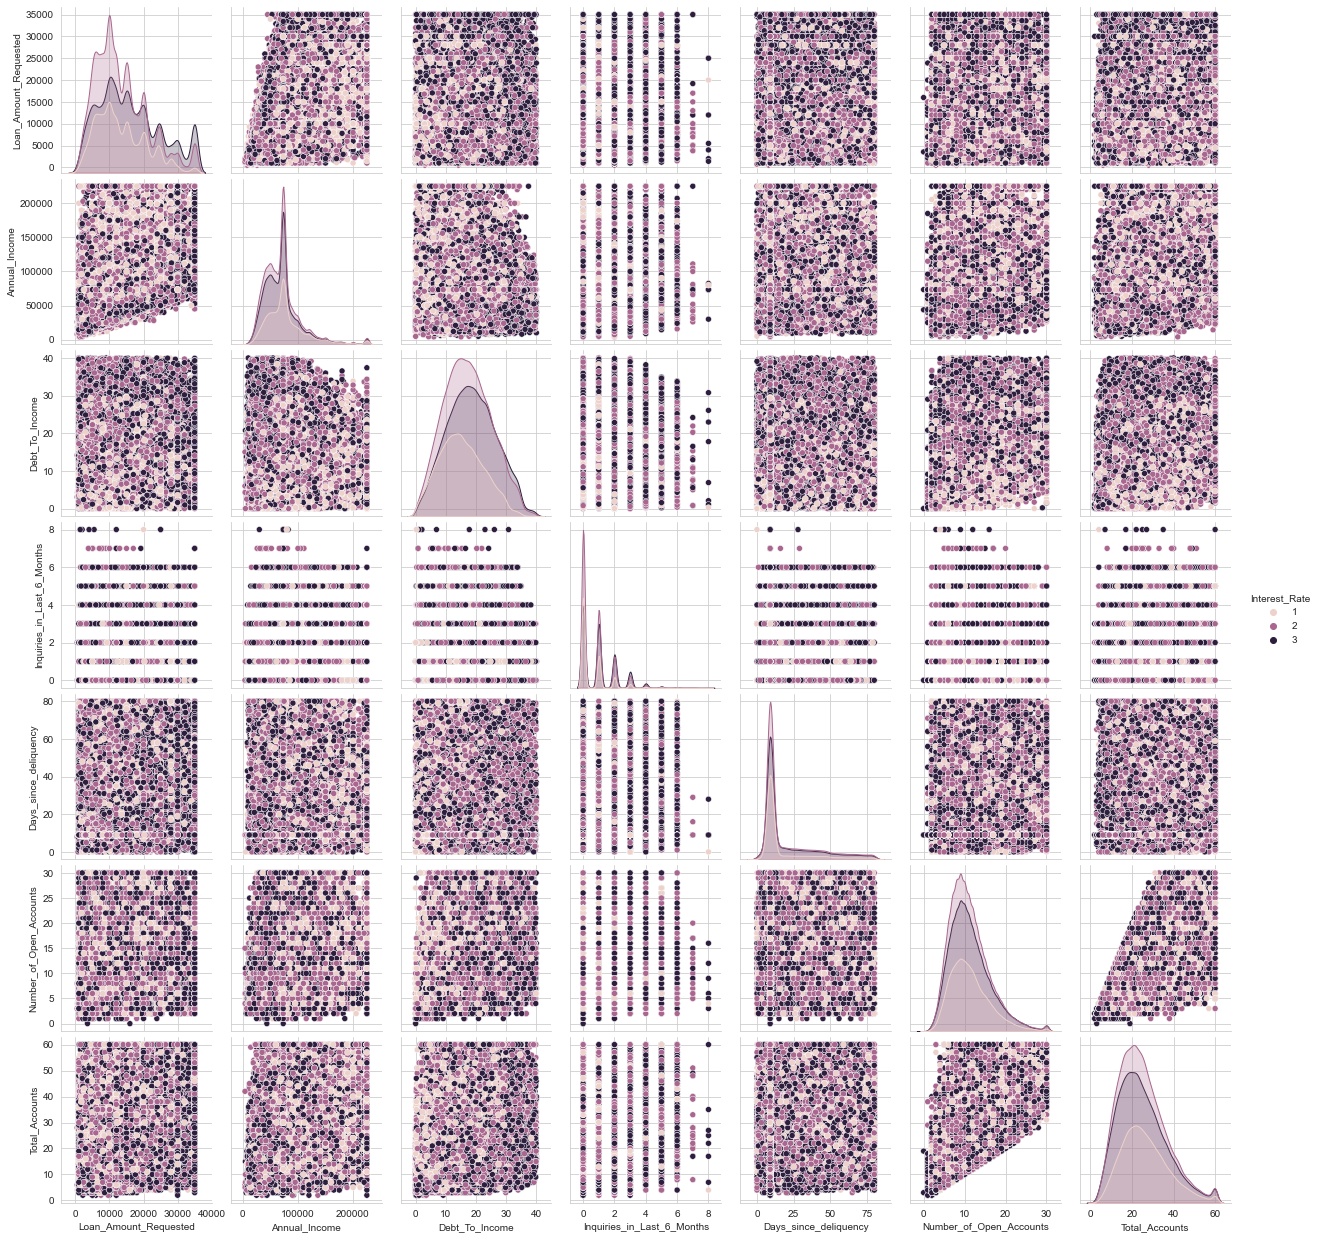

In [78]:
sns.pairplot(data, hue='Interest_Rate', corner=True,  markers=["o", "s", "D"])
plt.show()

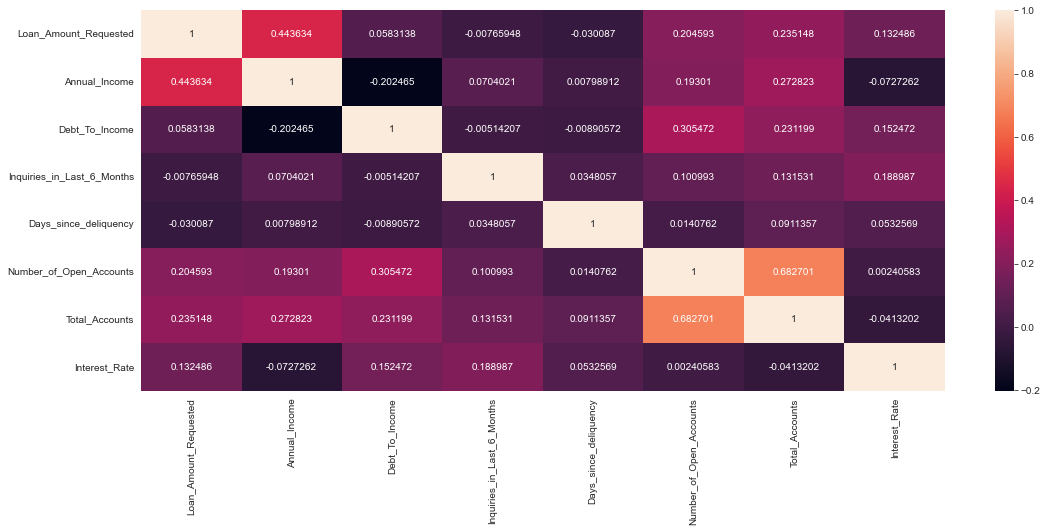

In [79]:
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='g');

    * Number of open accounts and total accounts are corelated (0.6)
    * we can remove either one of the feature.

In [80]:
data.drop(['Number_of_Open_Accounts'], axis=1, inplace=True)

### Encoding categorical variables

In [81]:
encoded_data = data.copy()

In [83]:
encoded_data.Employment_experience_in_years.value_counts()

10+    60286
2      14620
3      12974
0      12805
5      10814
1      10422
4       9784
7       9308
6       9094
8       7917
9       6285
Name: Employment_experience_in_years, dtype: int64

In [84]:
# Encoding employment experience based on their order of experinece(Label encoding)
encoded_data['Employment_experience_in_years'] = encoded_data['Employment_experience_in_years'].replace(to_replace=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'],
                                                                                  value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [85]:
encoded_data.head()

,Loan_Amount_Requested,Employment_experience_in_years,Ownership_of_home,Annual_Income,Income_verification,Purpose_Of_Loan,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Total_Accounts,Gender,Interest_Rate
0,7000,0,Rent,68000.000000,not verified,car,18.37,0,9.0,14,Female,1
1,30000,4,Mortgage,73331.159434,verified,debt_consolidation,14.93,0,17.0,24,Female,3
2,24725,7,Mortgage,75566.400000,verified,debt_consolidation,15.88,0,9.0,16,Male,3
3,16000,0,Mortgage,56160.000000,verified,debt_consolidation,14.34,3,9.0,22,Male,3
4,17000,8,Own,96000.000000,verified,debt_consolidation,22.17,1,9.0,30,Female,1


In [86]:
# Dummy trap to create dummy variables for remaining categorical features
hm = pd.get_dummies(encoded_data['Ownership_of_home'], drop_first=True)
pl = pd.get_dummies(encoded_data['Purpose_Of_Loan'], drop_first=True)
iv = pd.get_dummies(encoded_data['Income_verification'], drop_first=True)
g = pd.get_dummies(encoded_data['Gender'], drop_first=True)

In [89]:
# Concatenate dummy varaibles to the data 
encoded_data = pd.concat([encoded_data, hm, pl, iv, g], axis=1)

In [90]:
pd.set_option('display.max_columns', None)
# Displays all columns in the data
encoded_data.head()

,Loan_Amount_Requested,Employment_experience_in_years,Ownership_of_home,Annual_Income,Income_verification,Purpose_Of_Loan,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Total_Accounts,Gender,Interest_Rate,None,Own,Rent,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified,Male
0,7000,0,Rent,68000.000000,not verified,car,18.37,0,9.0,14,Female,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30000,4,Mortgage,73331.159434,verified,debt_consolidation,14.93,0,17.0,24,Female,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,24725,7,Mortgage,75566.400000,verified,debt_consolidation,15.88,0,9.0,16,Male,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,16000,0,Mortgage,56160.000000,verified,debt_consolidation,14.34,3,9.0,22,Male,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,17000,8,Own,96000.000000,verified,debt_consolidation,22.17,1,9.0,30,Female,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [92]:
encoded_data.drop(labels=['Ownership_of_home', 'Purpose_Of_Loan', 'Income_verification', 'Gender'], axis=1, inplace=True)

In [94]:
pd.set_option('display.max_columns', None)
encoded_data.head()

,Loan_Amount_Requested,Employment_experience_in_years,Annual_Income,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Total_Accounts,Interest_Rate,None,Own,Rent,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified,Male
0,7000,0,68000.000000,18.37,0,9.0,14,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30000,4,73331.159434,14.93,0,17.0,24,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,24725,7,75566.400000,15.88,0,9.0,16,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,16000,0,56160.000000,14.34,3,9.0,22,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,17000,8,96000.000000,22.17,1,9.0,30,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


### Declare dependent and independent features

In [95]:
X = encoded_data.drop('Interest_Rate',axis=1) # Independent features
y = encoded_data['Interest_Rate'] # Dependent feauture

In [96]:
X.head()

,Loan_Amount_Requested,Employment_experience_in_years,Annual_Income,Debt_To_Income,Inquiries_in_Last_6_Months,Days_since_deliquency,Total_Accounts,None,Own,Rent,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,verified,Male
0,7000,0,68000.000000,18.37,0,9.0,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30000,4,73331.159434,14.93,0,17.0,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,24725,7,75566.400000,15.88,0,9.0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,16000,0,56160.000000,14.34,3,9.0,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
4,17000,8,96000.000000,22.17,1,9.0,30,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [97]:
y.head()

0    1
1    3
2    3
3    3
4    1
Name: Interest_Rate, dtype: int64

### Split data into training and testing

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create model

In [99]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

### Train the model

In [101]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Predictions

In [103]:
test_pred = clf.predict(X_test)
train_pred  =clf.predict(X_train)

### Model evaluation

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [105]:
test_accuracy = accuracy_score(y_test, test_pred)
train_accuracy = accuracy_score(y_train, train_pred)
print('Training accuracy is :', train_accuracy, '\n','Testing accuracy is :',round(test_accuracy,2))

Training accuracy is : 1.0 
 Testing accuracy is : 0.43


In [106]:
# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
cm

array([[2115, 2964, 1642],
       [2994, 6322, 4702],
       [1754, 4759, 5610]], dtype=int64)

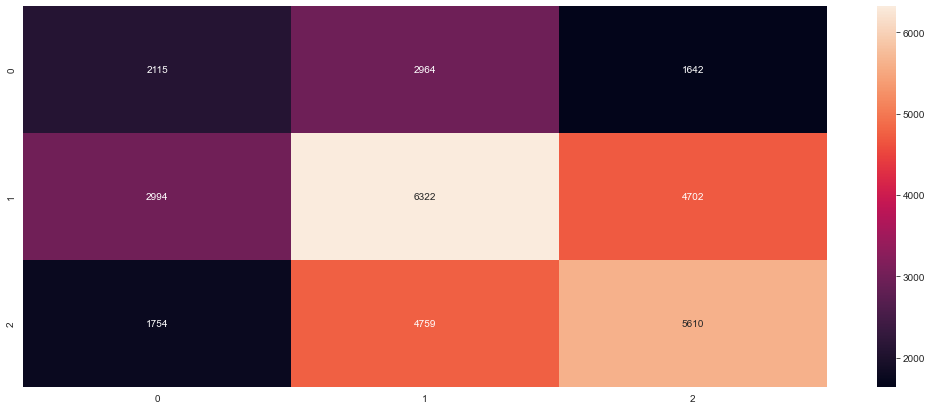

In [107]:
sns.heatmap(cm, annot=True, fmt='g');

In [108]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     27085
           2       1.00      1.00      1.00     56562
           3       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447



In [109]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.31      0.31      0.31      6721
           2       0.45      0.45      0.45     14018
           3       0.47      0.46      0.47     12123

    accuracy                           0.43     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.43      0.43     32862



In [116]:
def compare_model_train_test(model):
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_clf_report = classification_report(y_train, train_pred)
    test_clf_report = classification_report(y_test, test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n',)

In [117]:
compare_model_train_test(clf)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27085
           2       1.00      1.00      1.00     56562
           3       1.00      1.00      1.00     47800

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447
 
 Testing accuracy is : 0.43 
               precision    recall  f1-score   support

           1       0.31      0.31      0.31      6721
           2       0.45      0.45      0.45     14018
           3       0.47      0.46      0.47     12123

    accuracy                           0.43     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.43      0.43     32862
 



### Cross validation

In [112]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = cross_val_score(clf, X, y, cv=skf)
print(cv_score)
print('Average cross valid score is {}'.format(np.mean(cv_score)))

[0.43113627 0.43253606 0.4261457  0.43052766 0.43229262 0.43594425
 0.42511107 0.42754549 0.4261457  0.42854534]
Average cross valid score is 0.4295930165257372


### Sampling

In [168]:
# Before resampling
from collections import Counter
Counter(y_train)

Counter({1: 27085, 2: 56562, 3: 47800})

In [169]:
# over sampling by random over sampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [170]:
# After resampling
Counter(y_train_res)

Counter({1: 27085, 2: 27085, 3: 27085})

In [171]:
# Train the model
clf.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [172]:
# Predictions
test_pred = clf.predict(X_test)
train_pred  =clf.predict(X_train_res)

In [179]:
def compare_model_train_test(model):
    train_accuracy = accuracy_score(y_train_res, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_clf_report = classification_report(y_train_res, train_pred)
    test_clf_report = classification_report(y_test, test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n',)

In [180]:
compare_model_train_test(clf)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     27085
           2       1.00      1.00      1.00     27085
           3       1.00      1.00      1.00     27085

    accuracy                           1.00     81255
   macro avg       1.00      1.00      1.00     81255
weighted avg       1.00      1.00      1.00     81255
 
 Testing accuracy is : 0.41 
               precision    recall  f1-score   support

           1       0.30      0.44      0.35      6721
           2       0.45      0.36      0.40     14018
           3       0.47      0.45      0.46     12123

    accuracy                           0.41     32862
   macro avg       0.41      0.42      0.41     32862
weighted avg       0.43      0.41      0.41     32862
 



### Over sampling by SMOTE

In [181]:
Counter(y_train)

Counter({1: 27085, 2: 56562, 3: 47800})

In [182]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [183]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [184]:
Counter(y_train_smote)

Counter({1: 56562, 2: 56562, 3: 56562})

In [185]:
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [186]:
# Predictions
test_pred = clf.predict(X_test)
train_pred  =clf.predict(X_train_smote)

In [191]:
def compare_model_train_test(model):
    train_accuracy = accuracy_score(y_train_smote, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_clf_report = classification_report(y_train_smote, train_pred)
    test_clf_report = classification_report(y_test, test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n',)

In [192]:
compare_model_train_test(clf)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     56562
           2       1.00      1.00      1.00     56562
           3       1.00      1.00      1.00     56562

    accuracy                           1.00    169686
   macro avg       1.00      1.00      1.00    169686
weighted avg       1.00      1.00      1.00    169686
 
 Testing accuracy is : 0.42 
               precision    recall  f1-score   support

           1       0.30      0.35      0.32      6721
           2       0.45      0.42      0.43     14018
           3       0.48      0.47      0.47     12123

    accuracy                           0.42     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.42      0.42     32862
 



In [189]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.30      0.35      0.32      6721
           2       0.45      0.42      0.43     14018
           3       0.48      0.47      0.47     12123

    accuracy                           0.42     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.42      0.42     32862



In [149]:
clf.feature_importances_

array([1.51003464e-01, 7.87521121e-02, 1.47687277e-01, 1.97232693e-01,
       3.99253408e-02, 8.69844212e-02, 1.35668555e-01, 8.58697464e-05,
       1.02242142e-02, 2.52166689e-02, 1.29298003e-02, 1.66593779e-02,
       4.28252554e-04, 8.95598065e-03, 1.55692804e-03, 3.66809750e-03,
       3.21852490e-03, 1.90487669e-03, 1.07659609e-02, 2.86232854e-04,
       3.69530041e-03, 1.80579411e-03, 1.54681181e-03, 3.80303714e-02,
       2.17670745e-02])

### Hyper parameter tuning

In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
criterion = ["gini"]
splitter = ["best", "random"]
min_samples_split = [int(i) for i in np.arange(10, 50, 5)]
min_samples_leaf = [int(i) for i in np.arange(10, 50, 3)]
max_features= ["auto", "sqrt", "log2"]

In [153]:
param_grid = {'criterion':criterion, 'splitter':splitter,
             'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,
             'max_features':max_features,}
param_grid

{'criterion': ['gini'],
 'splitter': ['best', 'random'],
 'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45],
 'min_samples_leaf': [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49],
 'max_features': ['auto', 'sqrt', 'log2']}

In [154]:
grid_model = GridSearchCV(clf, param_grid=param_grid, cv = 5, return_train_score=True,
                                  n_jobs=-1, verbose=1)
grid_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 13, 16, 19, 22, 25, 28, 31,
                                              34, 37, 40, 43, 46, 49],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=1)

In [155]:
grid_model.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 13, 16, 19, 22, 25, 28, 31,
                                              34, 37, 40, 43, 46, 49],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45],
                         'splitter': ['best', 'random']},
             return_train_score=True, verbose=1)

In [156]:
grid_model.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 31,
 'min_samples_split': 20,
 'splitter': 'best'}

In [157]:
max_depth=clf.get_depth()

In [158]:
max_depth = [max_depth for max_depth in range(1, max_depth+1)]

In [160]:
param_grid = {'max_depth':max_depth}

In [161]:
from sklearn.metrics import make_scorer
depth_model = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))
depth_model

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring=make_scorer(accuracy_score))

In [162]:
depth_model.fit(X_train_smote, y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring=make_scorer(accuracy_score))

In [163]:
depth_model.best_params_

{'max_depth': 8}

### Final model

In [164]:
pruned_model = DecisionTreeClassifier(splitter='best', min_samples_split=20,
                                  min_samples_leaf=31,max_features='sqrt',
                                  criterion='gini', max_depth=10)

In [165]:
pruned_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=31,
                       min_samples_split=20)

In [193]:
# Predictions
test_pred = pruned_model.predict(X_test)
train_pred  =pruned_model.predict(X_train_smote)

In [194]:
compare_model_train_test(pruned_model)

Training accuracy is : 0.528499699444857 
               precision    recall  f1-score   support

           1       0.60      0.59      0.60     56562
           2       0.45      0.45      0.45     56562
           3       0.53      0.54      0.54     56562

    accuracy                           0.53    169686
   macro avg       0.53      0.53      0.53    169686
weighted avg       0.53      0.53      0.53    169686
 
 Testing accuracy is : 0.46 
               precision    recall  f1-score   support

           1       0.34      0.37      0.35      6721
           2       0.47      0.43      0.45     14018
           3       0.52      0.55      0.53     12123

    accuracy                           0.46     32862
   macro avg       0.44      0.45      0.45     32862
weighted avg       0.46      0.46      0.46     32862
 



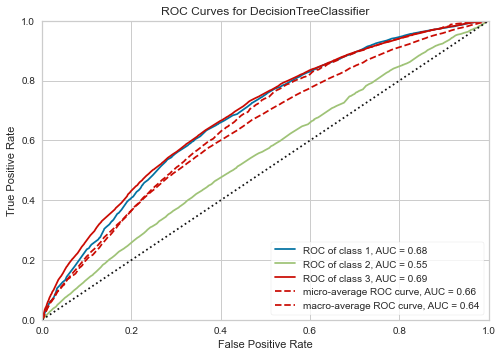

In [195]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(pruned_model)

visualizer.fit(X_train_smote, y_train_smote) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

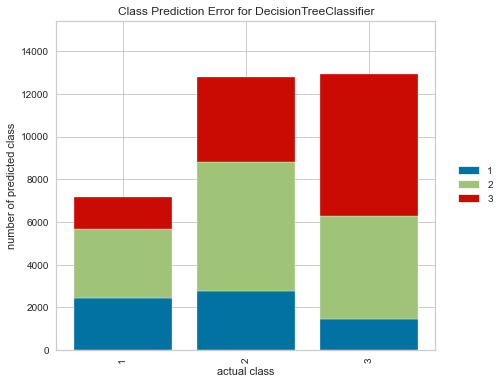

In [196]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pruned_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_smote, y_train_smote)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

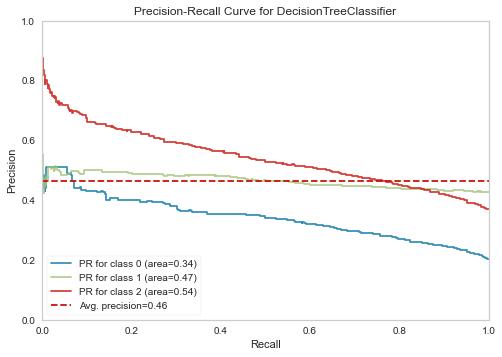

In [197]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(pruned_model,per_class=True)
viz.fit(X_train_smote, y_train_smote)
viz.score(X_test, y_test)
viz.show();

### Data resampling before split

In [198]:
smo = SMOTE()
X_res, y_res = smo.fit_resample(X, y)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [200]:
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=31,
                       min_samples_split=20)

In [202]:
# Predictions
test_pred = pruned_model.predict(X_test)
train_pred  =pruned_model.predict(X_train)

In [203]:
def compare_model_train_test(model):
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    train_clf_report = classification_report(y_train, train_pred)
    test_clf_report = classification_report(y_test, test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n',)

In [204]:
compare_model_train_test(pruned_model)

Training accuracy is : 0.5348835836403136 
               precision    recall  f1-score   support

           1       0.59      0.62      0.61     56338
           2       0.46      0.40      0.43     56633
           3       0.54      0.58      0.56     56421

    accuracy                           0.53    169392
   macro avg       0.53      0.54      0.53    169392
weighted avg       0.53      0.53      0.53    169392
 
 Testing accuracy is : 0.52 
               precision    recall  f1-score   support

           1       0.59      0.61      0.60     14242
           2       0.44      0.39      0.41     13947
           3       0.53      0.57      0.55     14159

    accuracy                           0.52     42348
   macro avg       0.52      0.52      0.52     42348
weighted avg       0.52      0.52      0.52     42348
 



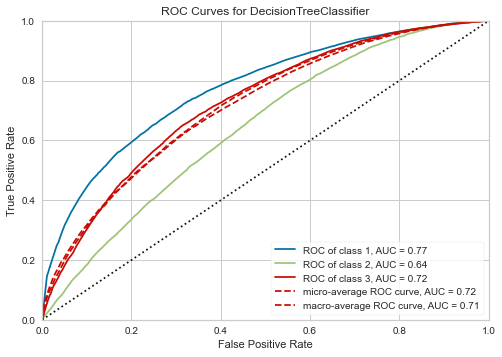

In [205]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(pruned_model)

visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

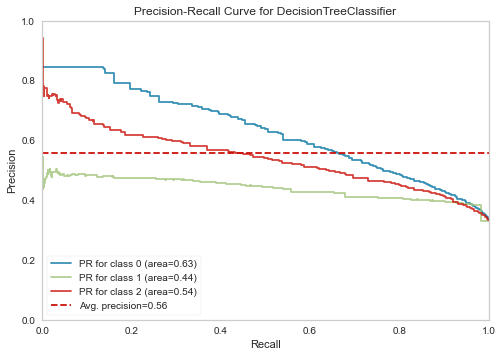

In [206]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(pruned_model,per_class=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();